# Week 5: Visual Computing Part I

What is Visual Computing? It is a field in Computer Science that involves analysing and synthesising visual data. This may include vision, graphics, and geometric processing. For our course, we will focus on the ML implementations of visual computing: image representation and preprocessing, image analysis wiith CNN and the kernel, exploring classic CNN architectures, and seeing how this can be applied in code to real world problems.


## Image Classification with CNN
In the example below, we will emonstrate how we can first load 1-channel greyscale images into a dataset, how to use kernels to manipulate images, and lastly how to train a CNN model with the dataset.

We will demonstrate how to classify Fashion MNIST images using pytorch and followingthe ML workflow.

![title](./media/ML-workflow.png)

In [1]:
# Import relevant libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Import relevant PyTorch classes
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor 
import torch.optim as optim

We need to check if CUDA is available. This is important because CUDA is required to accelerate image processing as it provides a platform for providing the parallel computing power of GPUs.

In [99]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Data Loading

The [Fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset contains 60,000 training images and 10,000 test images. Each is 28 x 28 greyscale image with a label representing one of 10 fashion classes. We can access this from the torchvision.datasets package.

In [100]:
batch_size = 5
train_dataset = torchvision.datasets.FashionMNIST(root='data/', train=True, download=True, transform=ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.FashionMNIST(root='data/', train=False, transform=ToTensor())
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

## Data Understanding & Visualisation

In this section we will demonstrate how to view the dataset to better understand it and see how we can format it as input to train our model. This will gives us an idea on the kind of model, the hyperparameters and loss functions we can choose to solve our classification problem.

In [101]:
labels_map  = {
    0: "T-shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat", 
    5: "Sandal", 
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

60000
Label of first sample: Ankle Boot
Shape of first sample: torch.Size([1, 28, 28])


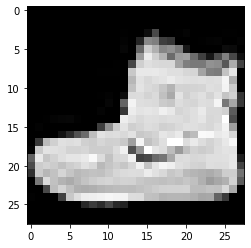

In [102]:
# Get first sample
print(len(train_dataset))
image, label = train_dataset[0]

# Get label of sample
print(f"Label of first sample: {labels_map[label]}")

# Print image of first sample
print(f"Shape of first sample: {image.shape}")

plt.imshow(image.squeeze(), cmap="gray")

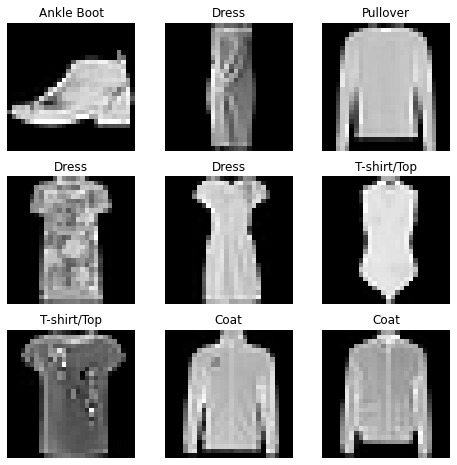

In [103]:
# Show images and their labels

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Constructing CNN
Now that we have done all of the required preprocessing steps, we can proceed to the most exciting stage, which is constructing the neural network. For this, we will build a convolutional neural network, which is a popular neural network architecture in the domain of computer vision.

In [104]:
# This format follows the structure shown in the Pytorch documentation

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 150)
        self.fc2 = nn.Linear(150, 70)
        self.fc3 = nn.Linear(70, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

## Define Loss Function and Optimizer

The loss function measures the dissimilarity between the predicted values (output of the model) and the actual target values (ground truth). Examples include mean square error (MSE) and cross-entroppy loss.

The optimizer is an algorithm used to update the model parameters so that this loss is minimized. This might include stochastic gradient descent (SGD) and Adam.

We can try out different combinations of losses and optimizers to increase our model performance.

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

## Train the Model

Training our classifier includes feeding the training dataset into our model, the model tries to map this input to a corresponding output predicted label which is compared to the actual label. The comparison is made by computing the loss, and parameters of the model are adjusted based on this loss value.

To allow the model to view the whole training dataset one means it has gone through one epoch. Training with multiple epochs means allowing the model to take the same training set as input multiple times, which can allow parameters to further adjust for learing.

In [106]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


print("Finished Training")

[1,  2000] loss: 0.783
[1,  4000] loss: 0.551
[1,  6000] loss: 0.524
[1,  8000] loss: 0.507
[1, 10000] loss: 0.479
[1, 12000] loss: 0.470
[2,  2000] loss: 0.470
[2,  4000] loss: 0.467
[2,  6000] loss: 0.460
[2,  8000] loss: 0.454
[2, 10000] loss: 0.454
[2, 12000] loss: 0.461
[3,  2000] loss: 0.427
[3,  4000] loss: 0.436
[3,  6000] loss: 0.455
[3,  8000] loss: 0.454
[3, 10000] loss: 0.426
[3, 12000] loss: 0.472
[4,  2000] loss: 0.443
[4,  4000] loss: 0.466
[4,  6000] loss: 0.443
[4,  8000] loss: 0.435
[4, 10000] loss: 0.456
[4, 12000] loss: 0.461
[5,  2000] loss: 0.435
[5,  4000] loss: 0.432
[5,  6000] loss: 0.439
[5,  8000] loss: 0.456
[5, 10000] loss: 0.459
[5, 12000] loss: 0.455
Finished Training


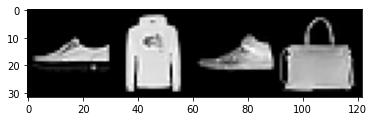

GroundTruth:  Sneaker Pullover Sneaker Bag


In [107]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# print images
imshow(torchvision.utils.make_grid(images[:4]))
print("GroundTruth: ", " ".join(f"{labels_map[labels.numpy()[j]]}" for j in range(4)))

In [110]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for i, data in enumerate(test_dataloader, 0):
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.to(device).size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the test images: {100 * correct // total} %")

Accuracy of the network on the test images: 83 %


## Model Improvements

Can you try to improve the performance of this model? We have some tips for you!
- Try changing the number and dimensions involved in the convolutional layers.
- Add a batch normalisation layer after each convolution layer.
- Try different optimizers and criterion.
- Apply data augmentation to increase the dataset.
- Normalize the image tensors during preprocessing.

Search up Pytorch and Sklearn documentation to implement these. Read this article for more information: [7 Best Techniques To Improve The Accuracy of CNN W/O Overfitting](https://medium.com/mlearning-ai/7-best-techniques-to-improve-the-accuracy-of-cnn-w-o-overfitting-6db06467182f).

References:
- [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [Fashion MNIST with Pytorch](https://www.kaggle.com/code/pankajj/fashion-mnist-with-pytorch-93-accuracy)